# Churn Prediction and Customer Retention

### Objective:
To develop a predictive model that maximizes the identification of customers at high risk of churn, enabling targeted interventions to improve retention rates.

## Contents

1. [Load Data](#Load-Data)

2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

3. [Preprocessing](#Preprocessing)

4. [Model Training and Evaluation](#Model-Training-and-Evaluation)

5. [Conclusion](#Conclusion)

## Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.duplicated().sum()

0

Data set is clean.

## Exploratory Data Analysis

In [6]:
import matpllot as plt
import seaborn as sns

C:\Users\Nicholas\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nicholas\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nicholas\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nicholas\anaconda3\envs\jupyterlab\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

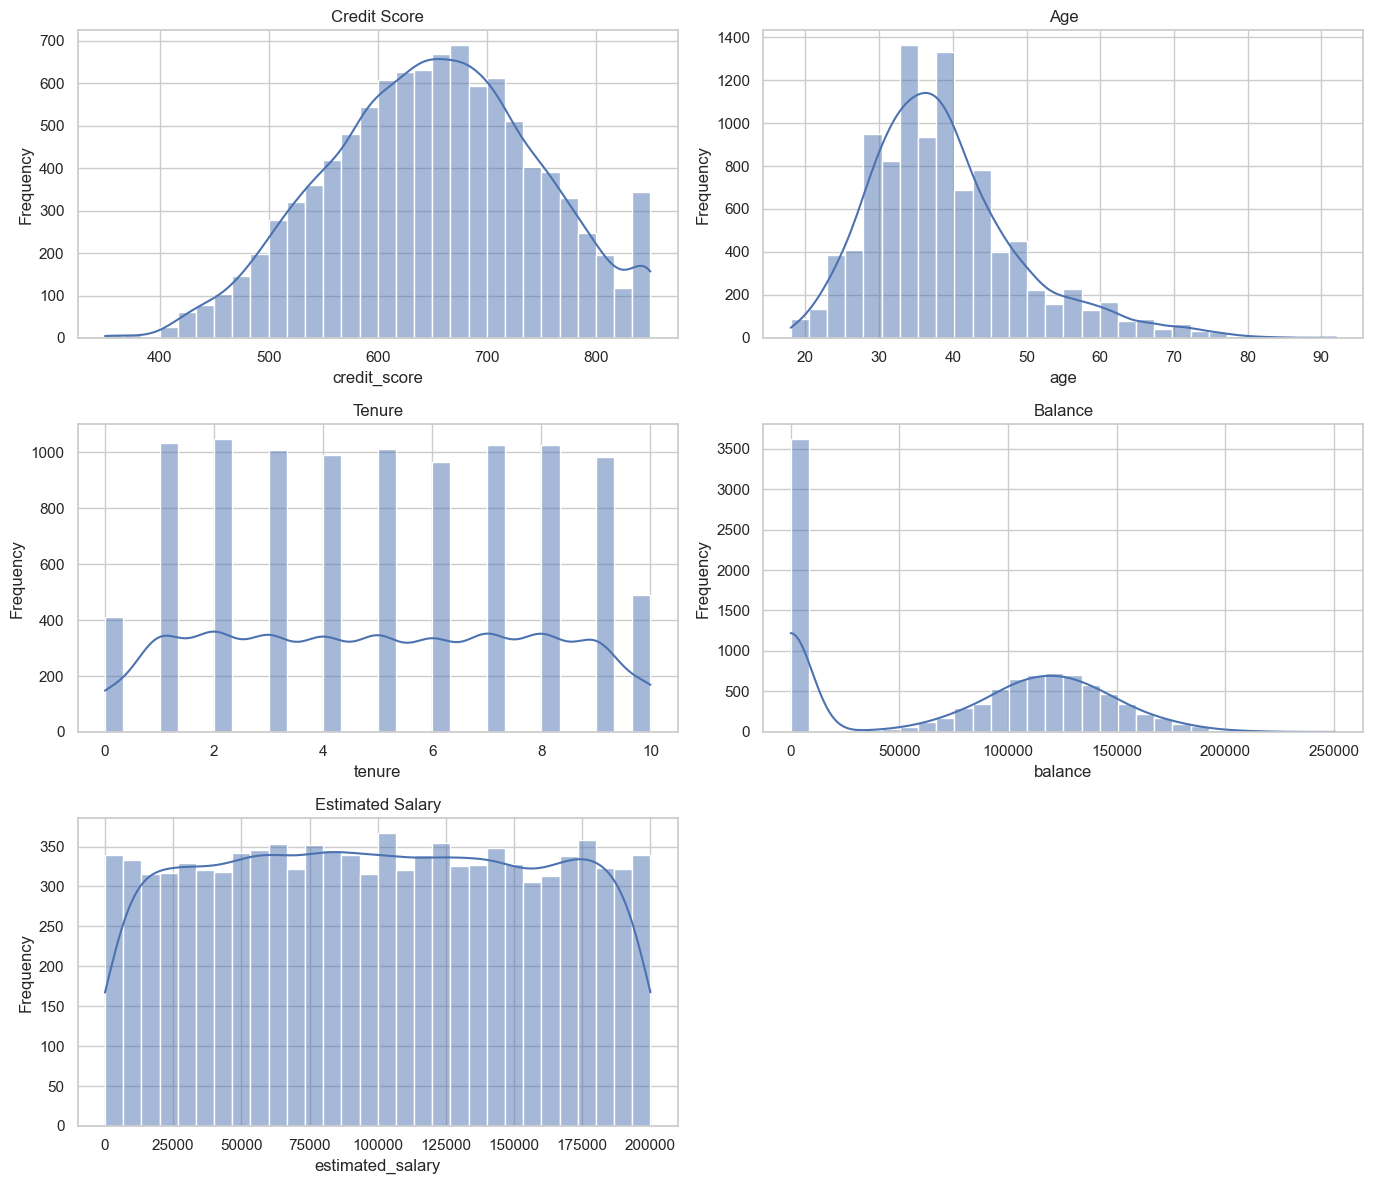

In [7]:
sns.set(style="whitegrid")

# Visualising continuous variables
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

continuous_vars = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

for ax, var in zip(axs.flat, continuous_vars):
    sns.histplot(df[var], kde=True, ax=ax, bins=30)
    ax.set_title(var.replace('_', ' ').title())
    ax.set_ylabel('Frequency')

plt.tight_layout()

# Removing the empty subplot (if any)
if len(continuous_vars) % 2 != 0:
    fig.delaxes(axs.flatten()[-1])

plt.show()

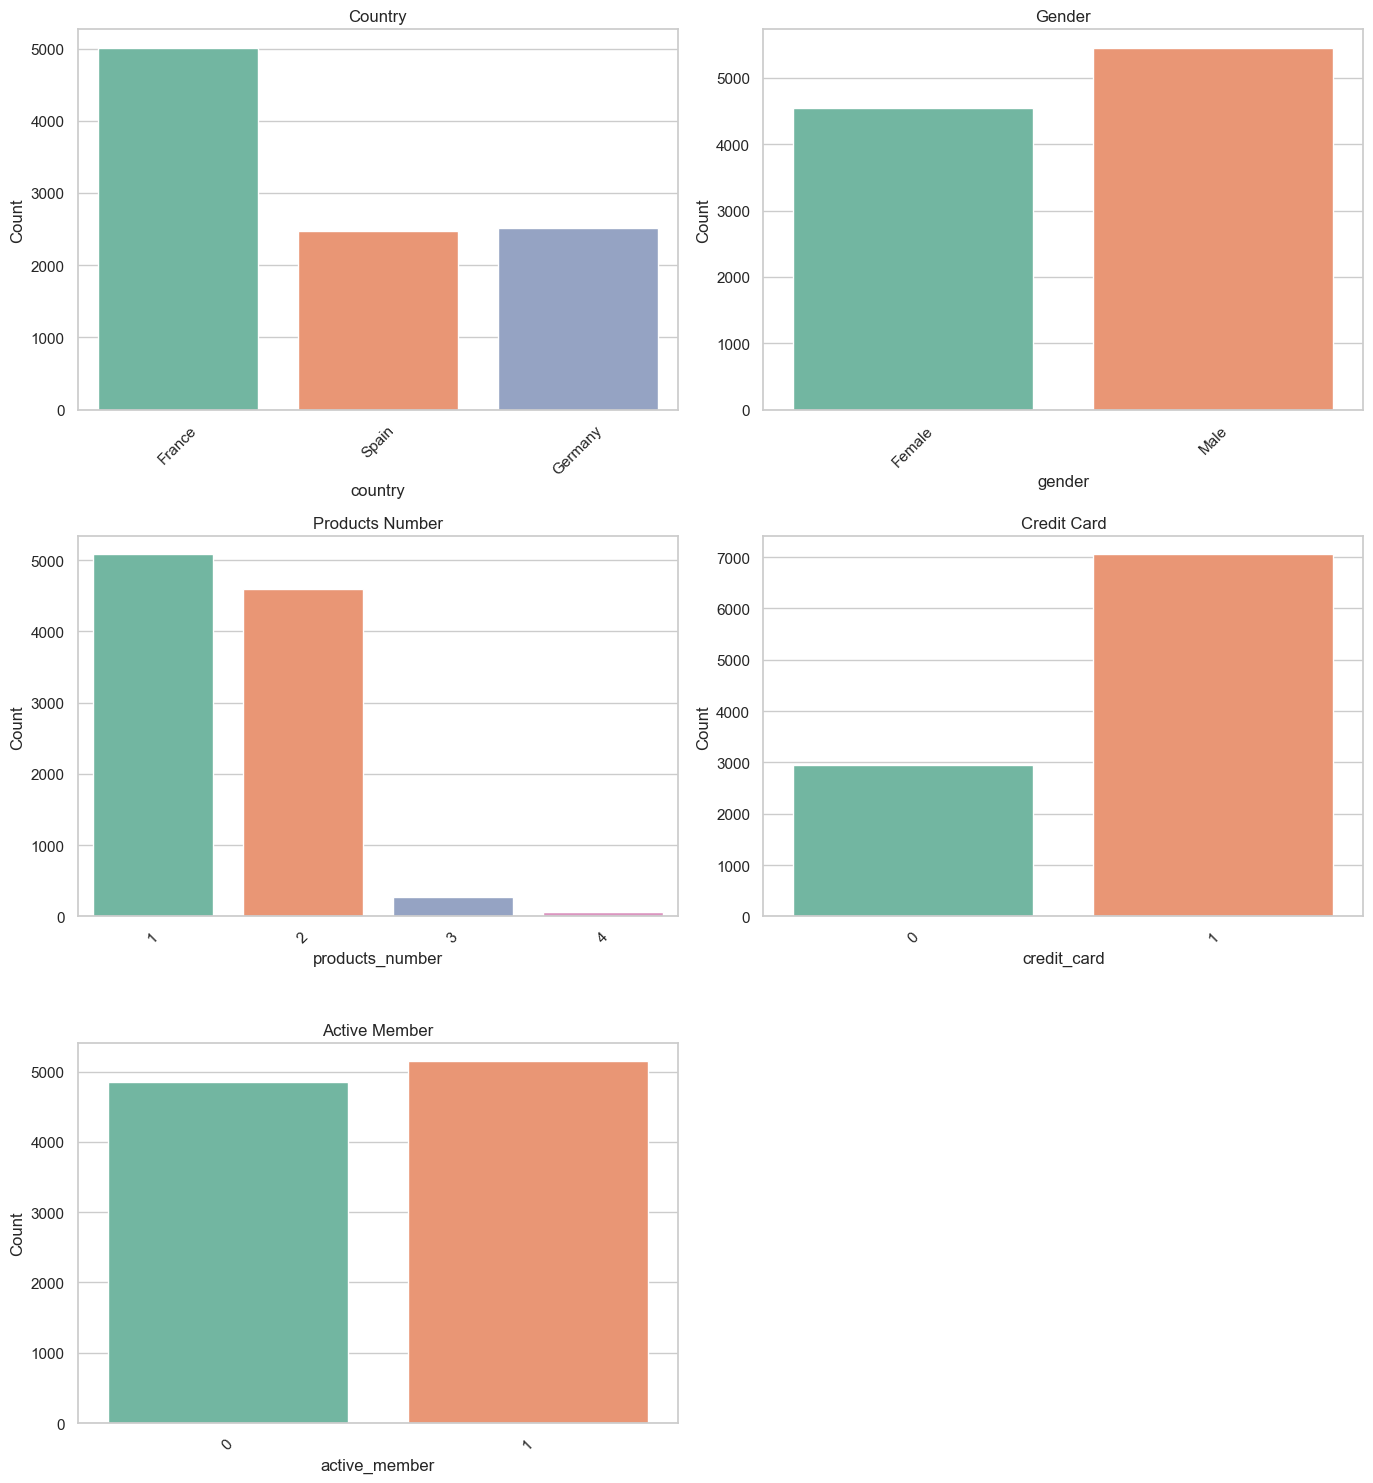

In [8]:
# Visualising categorical variables
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

categorical_vars = ['country', 'gender', 'products_number', 'credit_card', 'active_member']

for ax, var in zip(axs.flat, categorical_vars):
    sns.countplot(x=var, data=df, ax=ax, palette='Set2')
    ax.set_title(var.replace('_', ' ').title())
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Removing the empty subplot (if any)
if len(categorical_vars) % 2 != 0:
    fig.delaxes(axs.flatten()[-1])

plt.show()

C:\Users\Nicholas\AppData\Local\Temp\ipykernel_18996\532727315.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='churn', data=df, ax=ax, ci=None, palette='Set1')
C:\Users\Nicholas\AppData\Local\Temp\ipykernel_18996\532727315.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='churn', data=df, ax=ax, ci=None, palette='Set1')
C:\Users\Nicholas\AppData\Local\Temp\ipykernel_18996\532727315.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='churn', data=df, ax=ax, ci=None, palette='Set1')
C:\Users\Nicholas\AppData\Local\Temp\ipykernel_18996\532727315.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var, y='churn', data=df, ax=ax, ci=None, palette='Set1')
C:\Users\Nicholas\AppData\Local\Temp\ipykernel_18996\5327273

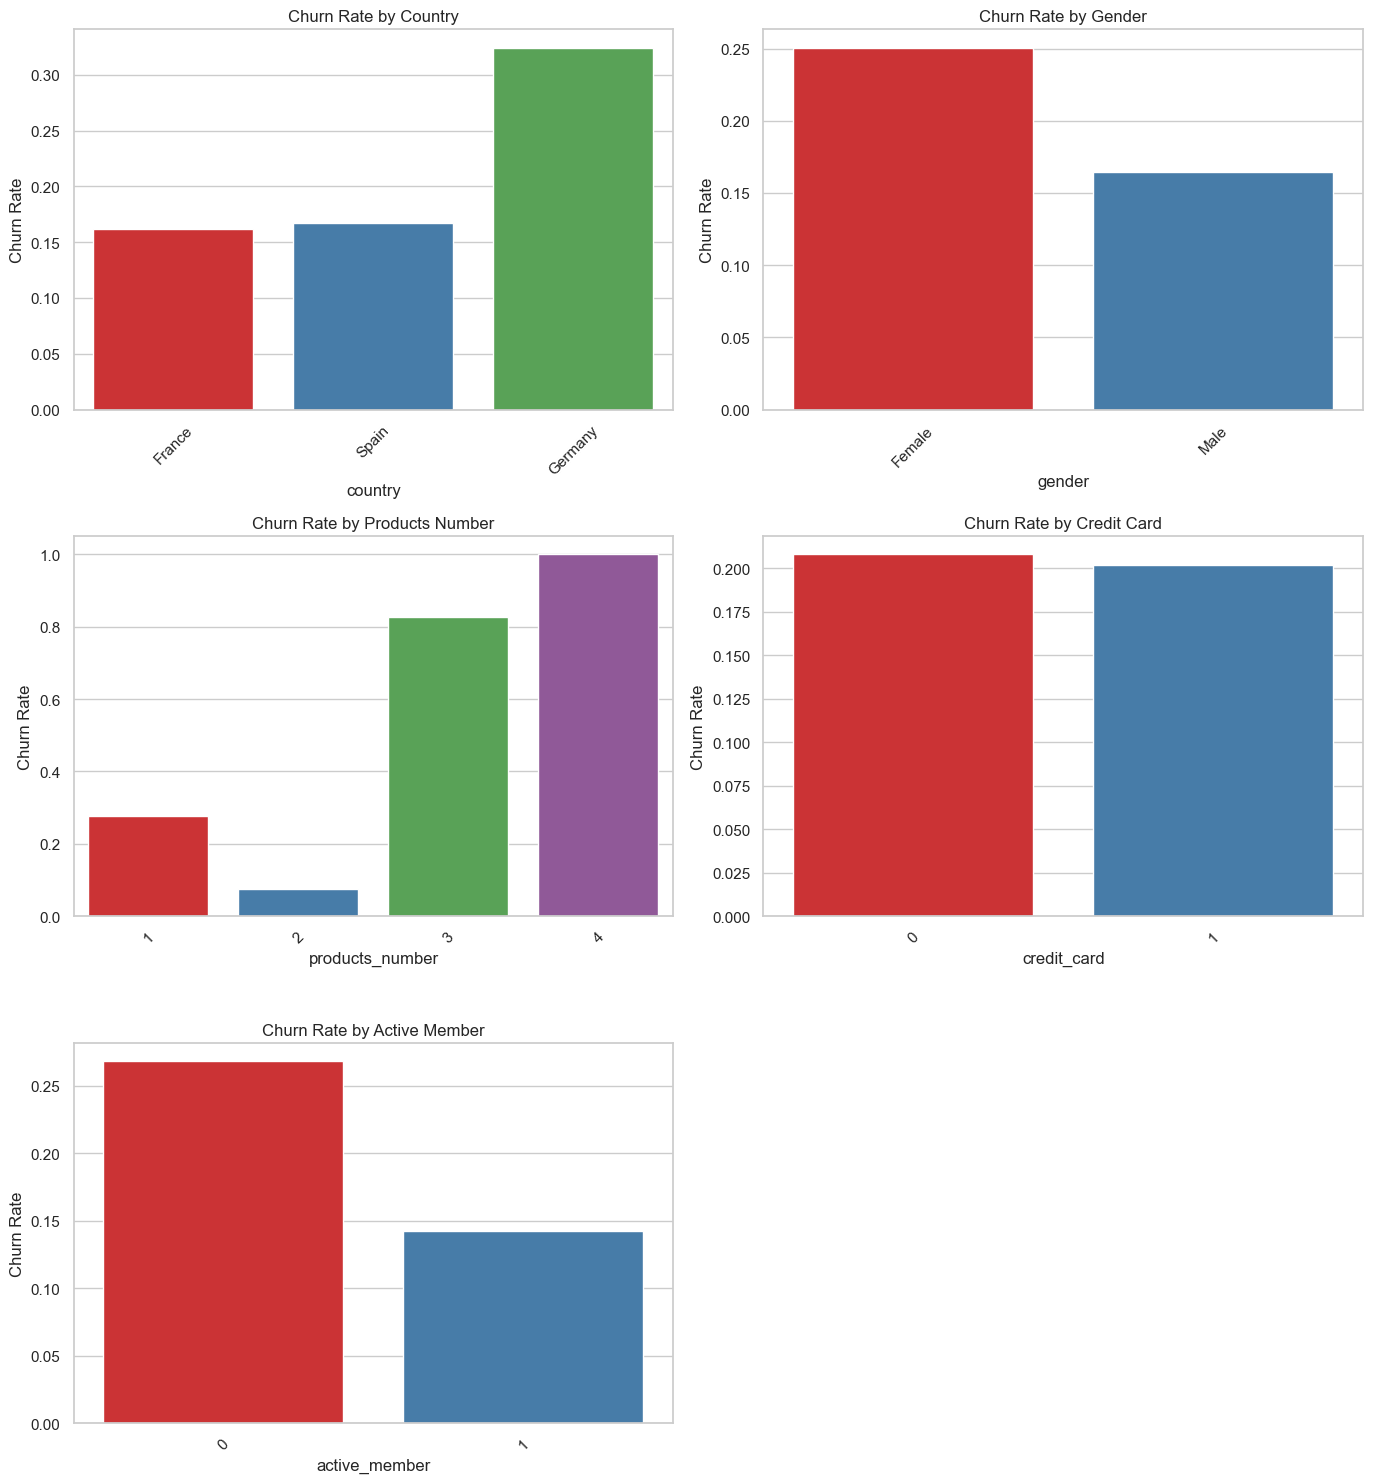

In [9]:
# Visualising churn rate by categorical variables
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

for ax, var in zip(axs.flat, categorical_vars):
    sns.barplot(x=var, y='churn', data=df, ax=ax, ci=None, palette='Set1')
    ax.set_title(f'Churn Rate by {var.replace("_", " ").title()}')
    ax.set_ylabel('Churn Rate')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Removing the empty subplot (if any)
if len(categorical_vars) % 2 != 0:
    fig.delaxes(axs.flatten()[-1])

plt.show()

## Preprocessing

Our dataset requires preprocessing before it's ready for machine learning. We need to encode variables using One-hot encoding.

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Select categorical variables for One-hot encoding
categorical_vars = ['country', 'gender']

encoder = OneHotEncoder(drop='first')
encoded_cats = encoder.fit_transform(df[categorical_vars]).toarray()

# Creating dataFrame from encoded variables
encoded_cats_df = pd.DataFrame(encoded_cats, 
                               columns=encoder.get_feature_names_out(categorical_vars))

# Dropping unwanted columns and adding encoded data
numerical_vars = df.drop(columns=['customer_id', 'churn'] + categorical_vars)
encoded_data = pd.concat([numerical_vars, encoded_cats_df, df['churn']], axis=1)

In [12]:
encoded_data

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male,churn
0,619,42,2,0.00,1,1,1,101348.88,0.0,0.0,0.0,1
1,608,41,1,83807.86,1,0,1,112542.58,0.0,1.0,0.0,0
2,502,42,8,159660.80,3,1,0,113931.57,0.0,0.0,0.0,1
3,699,39,1,0.00,2,0,0,93826.63,0.0,0.0,0.0,0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0.0,0.0,1.0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0.0,0.0,1.0,0
9997,709,36,7,0.00,1,0,1,42085.58,0.0,0.0,0.0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1.0,0.0,1.0,1


In [13]:
# Change dtype for encoded variables
encoded_data['country_Germany'] = encoded_data['country_Germany'].astype(int)
encoded_data['country_Spain'] = encoded_data['country_Spain'].astype(int)
encoded_data['gender_Male'] = encoded_data['gender_Male'].astype(int)

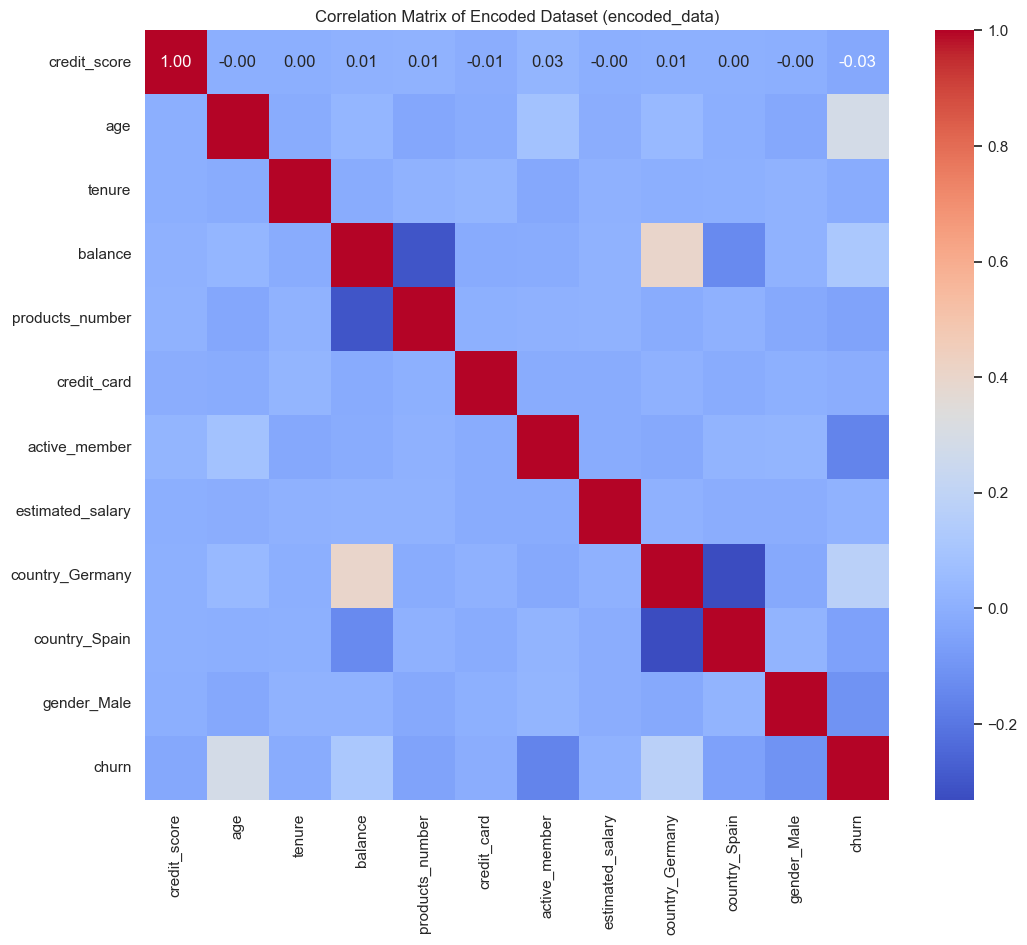

In [14]:
# Correlation matrix for encoded_data DataFrame
correlation_matrix_encoded = encoded_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Encoded Dataset (encoded_data)')
plt.show()

In [15]:
# Define features and target variable as X and Y, respectively
X = encoded_data.drop(columns=['churn'])
y = encoded_data['churn']

## Model Training and Evaluation

Our dataset is ready for machine learning. With our goal of retaining as many potentially churned customers as possible, our priority is to maximize the recall score. This ensures we identify as many at-risk customers as we can, allowing for targeted retention strategies and minimizing customer attrition.

### XGBoost classifier

In [16]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [17]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate model
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC Score": roc_auc_score(y_test, y_pred_proba)
}

print(metrics)

{'Accuracy': 0.864, 'Precision': 0.7137809187279152, 'Recall': 0.5139949109414759, 'F1 Score': 0.5976331360946746, 'ROC-AUC Score': 0.8495370920163218}


### Tune Hyperparameters and Balance Classes

In [18]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [19]:
# Balance data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Tune Hyperparameters
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Training XGBoost model with best parameters
best_xgb_model = XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

# Evaluate improved model
y_pred = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC Score": roc_auc_score(y_test, y_pred_proba)
}

print("Metrics after improvement:")
print(metrics)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.6}
Metrics after improvement:
{'Accuracy': 0.8709981167608286, 'Precision': 0.8555417185554172, 'Recall': 0.8847392144236961, 'F1 Score': 0.8698955365622031, 'ROC-AUC Score': 0.9435306652197966}


### 5-Fold Cross-validation Using the XGBoost Classifier

In [20]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer

In [21]:
# Define XGBoost classifier with best parameters
best_xgb_model = XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.6, random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'roc_auc_score': make_scorer(roc_auc_score)
}

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(best_xgb_model, X, y, cv=cv, scoring=scoring)

# Calculate mean and standard deviation of each metric across folds
mean_scores = {metric: scores.mean() for metric, scores in cv_results.items()}
std_scores = {metric: scores.std() for metric, scores in cv_results.items()}

print("Cross-validation results:")
for metric in mean_scores:
    print(f"{metric}: {mean_scores[metric]:.4f} (±{std_scores[metric]:.4f})")

Cross-validation results:
fit_time: 0.5657 (±0.1175)
score_time: 0.0174 (±0.0053)
test_accuracy: 0.8505 (±0.0037)
test_precision: 0.6872 (±0.0118)
test_recall: 0.4890 (±0.0247)
test_f1_score: 0.5709 (±0.0173)
test_roc_auc_score: 0.7160 (±0.0109)


### Stratified K-Fold Cross-validation on an XGBoost Model with Predefined Hyperparameters

In [22]:
import numpy as np

In [25]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'roc_auc_score': roc_auc_score,
    'accuracy_score': accuracy_score,
    'precision_score': precision_score,
    'recall_score': recall_score,
    'f1_score': f1_score
}
cv_results = {metric: [] for metric in scoring}

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train model
    best_xgb_model.fit(X_train, y_train)

    # Predict on test set with default threshold
    y_pred = best_xgb_model.predict(X_test)
    y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

    # Adjust threshold
    threshold = 0.4
    y_pred_adjusted = (y_pred_proba > threshold).astype(int)

    # Evaluate model with adjusted threshold
    for metric_name, metric_func in scoring.items():
        if metric_name == 'roc_auc_score':
            cv_results[metric_name].append(metric_func(y_test, y_pred_proba))
        else:
            cv_results[metric_name].append(metric_func(y_test, y_pred_adjusted))

print("Cross-validation results with adjusted threshold:")
for metric, scores in cv_results.items():
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"{metric}: {mean_score:.4f} (±{std_score:.4f})")

Cross-validation results with adjusted threshold:
roc_auc_score: 0.8441 (±0.0077)
accuracy_score: 0.8453 (±0.0055)
precision_score: 0.6430 (±0.0171)
recall_score: 0.5420 (±0.0218)
f1_score: 0.5879 (±0.0156)


### Improved Model with Adjusted Threshold and Class Weighting

In [26]:
# Perform stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for metric in scoring:
    cv_results[metric] = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train model with class weighting
    class_weight = len(y_train) / (2 * np.bincount(y_train))
    class_weight = {i: weight for i, weight in enumerate(class_weight)}
    best_xgb_model.fit(X_train, y_train, sample_weight=y_train.map(class_weight))

    # Predict on test set with default threshold
    y_pred = best_xgb_model.predict(X_test)
    y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

    # Adjust threshold
    threshold = 0.4
    y_pred_adjusted = (y_pred_proba > threshold).astype(int)

    # Evaluate model with adjusted threshold
    for metric_name, metric_func in scoring.items():
        if metric_name == 'roc_auc_score':
            cv_results[metric_name].append(metric_func(y_test, y_pred_proba))
        else:
            cv_results[metric_name].append(metric_func(y_test, y_pred_adjusted))

print("Cross-validation results with class weighting and adjusted threshold:")
for metric in mean_scores:
    print(f"{metric}: {mean_scores[metric]:.4f} (±{std_scores[metric]:.4f})")

Cross-validation results with class weighting and adjusted threshold:
fit_time: 0.5657 (±0.1175)
score_time: 0.0174 (±0.0053)
test_accuracy: 0.8505 (±0.0037)
test_precision: 0.6872 (±0.0118)
test_recall: 0.4890 (±0.0247)
test_f1_score: 0.5709 (±0.0173)
test_roc_auc_score: 0.7160 (±0.0109)


### Conclusion

Our adjustments have greatly improved the model's ability to find customers likely to leave. This model, a stratified k-fold cross-validation with adjusted threshold and class weighting, strikes a balance between accuracy and recall. However, this came at a cost of precision, which went down a bit. Here are the final results of our model:

-Accuracy: 82.12%

-Precision: 55.14%

-Recall: 65.74%

-F1 Score: 59.96%

-ROC-AUC Score: 84.35%


Overall, our model is now much better at spotting customers who might churn, helping us focus our efforts on keeping them.